<a href="https://colab.research.google.com/github/rukayah/Amazon_Project/blob/main/Copy_of_141.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project

## Background

We are glad you have successfully reached the capstone project part of "Data Science Fundamentals" course. You will put everything 
you have learned so far about data science to work. The outcome of this module should potentially serve as your portfolio item.

Unlike with previous projects, this time you are free to choose a dataset to explore from three suggested ones. As you will have to solve a provided problem, there will not be list of predefined questions that you have to answer - be creative and explore any dimensions of data you deem worth analyzing.

Although this might seem scary, this is how data science looks like in the industry. Often, it's your responsibility to not only give answers using the data, but also raise questions. The more creatively you look at this project, the better. Good luck!

----

## Requirements

Whichever problem you choose to analyze, general requirements are as follow:

#### Exploratory Data Analysis
* Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data.
* Grouping the data and analyzing the groups - using Pandas aggregate methods.
* Work with features - handle missing data if needed, use pandas date APIs.
* Manipulate datasets - use joins in needed.
* Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.

#### Statistical hypothesis testing
* Use at least one statistical significance test.
* Report p-values.
* Use visualizations.

#### Modeling
* Visualize data with dimensionality reduction algorithms.
* Perform cluster analysis.
* Use a linear model to explain relationships and predict new values.

#### Presentation
* Present the project - the data, methods and results.

## Problems

#### COVID-19 crisis 

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1574515944794-d6dedc7150de?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1532&q=80" /></div>

The world is still struggling with one the most rapidly spreading pandemics. There are a lot of people who say that data is the best weapon we can use in this "Corona Fight". 

Imagine that you are one of the best data scientists in your country. The president of your country asked you to analyze the COVID-19 patient-level data of South Korea and prepare your homeland for the next wave of the pandemic. You, as the lead data scientist of your country **have to create and prove a plan of fighting the pandemics in your country** by analyzing the provided data. You must get most important insights using learned data science techniques and present them to the lead of your country.

https://www.kaggle.com/kimjihoo/coronavirusdataset/

# The coronavirusdataset contains tables of data describing different events relating to the pandemic in South Korea. Case data, patient data, time series data and weather data are some of the table of data provided by the KCDC (Korean centers for Disease Control and Prevention). We would start by exploring some of these datasets for insights then modelling.

# **Import packages from python**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from datetime import datetime
import math
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
#from statsmodels.stats import weightstats as stests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Read the data

In [2]:
case = pd.read_csv('Case.csv') #Data of COVID-19 infection cases in South Korea
patient = pd.read_csv('PatientInfo.csv') #Epidemiological data of COVID-19 patients in South Korea
time = pd.read_csv('Time.csv') #parse_dates=True) #Time series data of covid-19 status in south korea
timea = pd.read_csv('TimeAge.csv') #Time series data of COVID-19 status in terms of age in South Korea
timeg = pd.read_csv('TimeGender.csv') #Time series data of COVID-19 status in terms of gender in South Korea
timep = pd.read_csv('TimeProvince.csv') #Time series data of COVID-19 status in terms of province in South Korea


# Exploratory Data Analysis (EDA) on the case data table 

In [3]:
#Check for the number of rows and columns in the table
case.shape 

(174, 8)

In [4]:
#Check for missing values
case.isnull().sum()

 case_id          0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

In [5]:
# Find how much group infection case occured and the type of infection case by province
pd.set_option('display.max_columns', None) # display all column value
pd.set_option('display.max_rows', None) # display all row value
pd.crosstab(case.province,[case.group,case.infection_case], margins=True, margins_name="Total")

group                            False                      \
infection_case    contact with patient etc overseas inflow   
province                                                     
Busan                                1   1               1   
Chungcheongbuk-do                    1   1               1   
Chungcheongnam-do                    1   1               1   
Daegu                                1   1               1   
Daejeon                              1   1               1   
Gangwon-do                           1   1               1   
Gwangju                              1   1               1   
Gyeonggi-do                          1   1               1   
Gyeongsangbuk-do                     1   1               1   
Gyeongsangnam-do                     1   1               1   
Incheon                              1   1               1   
Jeju-do                              1   1               1   
Jeollabuk-do                         0   1               1   
Jeollanam-do                         1   1               1   
Sejong                               1   1               1   
Seoul                                1   1               1   
Ulsan                                1   1               1   
Total                               16  17              17   

group                                   True                                  \
infection_case    Anyang Gunpo Pastors Group Biblical Language study meeting   
province                                                                       
Busan                                      0                               0   
Chungcheongbuk-do                          0                               0   
Chungcheongnam-do                          0                               0   
Daegu                                      0                               0   
Daejeon                                    0                               0   
Gangwon-do                                 0                               0   
Gwangju                                    0                               0   
Gyeonggi-do                                1                               0   
Gyeongsangbuk-do                           0                               0   
Gyeongsangnam-do                           0                               0   
Incheon                                    0                               0   
Jeju-do                                    0                               0   
Jeollabuk-do                               0                               0   
Jeollanam-do                               0                               0   
Sejong                                     0                               0   
Seoul                                      1                               1   
Ulsan                                      0                               0   
Total                                      2                               1   

group                                                                   \
infection_case    Bonghwa Pureun Nursing Home Bundang Jesaeng Hospital   
province                                                                 
Busan                                       0                        0   
Chungcheongbuk-do                           0                        0   
Chungcheongnam-do                           0                        0   
Daegu                                       0                        0   
Daejeon                                     0                        0   
Gangwon-do                                  0                        0   
Gwangju                                     0                        0   
Gyeonggi-do                                 0                        1   
Gyeongsangbuk-do                            1                        0   
Gyeongsangnam-do                            0                        0   
Incheon                                     0         

### We have a total of 17 province. Result above shows that the non group infection case such as contact with person occured in all province. Overseas inflow also occured in all province except "jeollabuk-do". However group infections category occured mostly in the "seoul province" with a value of 35 cases. and the least group infection occured in "Ulsan" and "Jeju-do" with a value of 1.

province           infection_case                 
Daegu              Shincheonji Church                 4511
                   contact with patient                917
                   etc                                 747
Gyeongsangbuk-do   Shincheonji Church                  566
Gyeonggi-do        overseas inflow                     305
Seoul              overseas inflow                     298
Daegu              Second Mi-Ju Hospital               196
Gyeongsangbuk-do   contact with patient                190
Seoul              contact with patient                162
                   Itaewon Clubs                       139
Gyeongsangbuk-do   etc                                 133
Daegu              Hansarang Convalescent Hospital     124
Gyeongsangbuk-do   Cheongdo Daenam Hospital            119
Seoul              Richway                             119
Chungcheongnam-do  gym facility in Cheonan             103
Daegu              Daesil Convalescent Hospital        101
Seoul

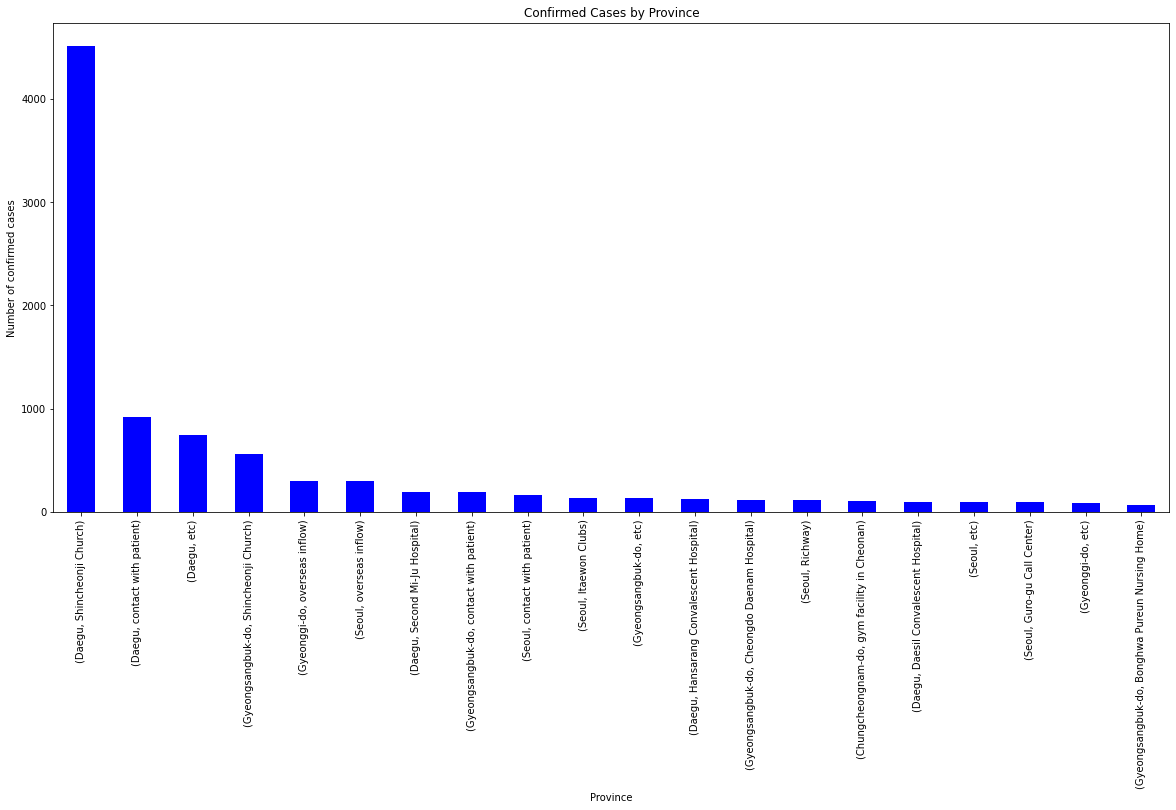

In [6]:
#What is the number of confirmed cases by province and the infection_case in the given period of time.
province_confirmed = case.groupby(['province','infection_case'])['confirmed'].sum()
province_confirmed_sorted = province_confirmed.sort_values(ascending = False).head(20)
print(province_confirmed_sorted)
#plot on a bar chart
plt.figure(figsize=(20,9))
province_confirmed_sorted.plot(kind = 'bar', color = "blue")

plt.title('Confirmed Cases by Province')
plt.ylabel('Number of confirmed cases')
plt.xlabel('Province')

plt.show()

### It can be seen from above plot that the highest confirmed case appeared in "Daegu" province and major infection case is as a result of Shincheonji Church. Daegu has the highest number of confirmed cases of 6680 and jeju-do being the lowest of 19.



# EDA on the time ( Time series data of covid-19 status in south korea) data table

In [7]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [8]:
# convert the 'date' column to datetime format and confirm
time['date'] = pd.to_datetime(time['date'])
#check for missing values
time.isnull().sum()

date         0
time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

###  There are no missing values and all features are in the correct format 

In [9]:
#make a copy of time table for more EDA
time_copy = time.copy()

In [10]:
# The features in the data are accumulated test, negative, confirmed, released and deceased covid cases
# find the daily number for all necessary variable as accumulated values were given and convert to integer
time_copy['daily_test'] = time_copy['test'].diff()
time_copy['daily_negative'] = time_copy['negative'].diff()
time_copy['daily_confirmed'] = time_copy['confirmed'].diff()
time_copy['daily_released'] = time_copy['released'].diff()
time_copy['daily_deceased'] = time_copy['deceased'].diff()

In [11]:
time_copy = time_copy.dropna() # drop rows with missing values

In [12]:
#All new features are in float,  we need to convert to integers
time_copy[['daily_test','daily_negative','daily_confirmed','daily_released','daily_deceased']] = time_copy[['daily_test','daily_negative','daily_confirmed','daily_released','daily_deceased']].astype('int')
time_copy.dtypes

date               datetime64[ns]
time                        int64
test                        int64
negative                    int64
confirmed                   int64
released                    int64
deceased                    int64
daily_test                  int64
daily_negative              int64
daily_confirmed             int64
daily_released              int64
daily_deceased              int64
dtype: object

In [13]:
#Split the date column into year, months,days and day name
time_copy['day_name'] = time_copy['date'].apply(lambda x: x.strftime('%A'))
time_copy['month'] = time_copy['date'].dt.month
time_copy['year'] = time_copy['date'].dt.year
time_copy['day'] = time_copy['date'].dt.day

Text(0.5, 1.0, 'Trend of Accumulated confirmed case')

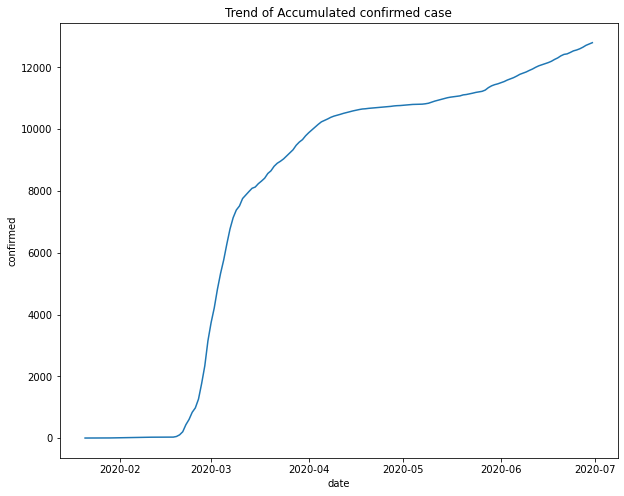

In [14]:
#plot a line graph showing the trend of accumulated confirmed case
plt.figure(figsize=(10,8))
sns.lineplot(data=time_copy, x="date", y="confirmed")

plt.title('Trend of Accumulated confirmed case')

### There was rapid increase in march to about 8,000 confirmed cases

Text(0.5, 1.0, 'Trend of daily confirmed case per month')

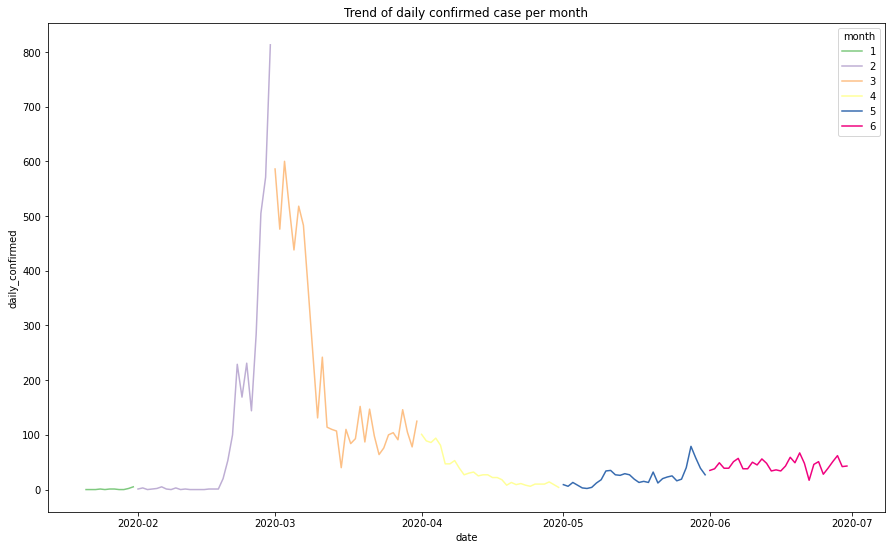

In [15]:
#plot a line graph for daily confirmation number
plt.figure(figsize=(15,9))
sns.lineplot(data=time_copy, x="date", y="daily_confirmed", hue= 'month', palette = "Accent" )
plt.title('Trend of daily confirmed case per month')

### The highest confirmed case occured at the end of february and it steep down afterward

Text(0.5, 1.0, 'Trend of daily confirmed case with day_name')

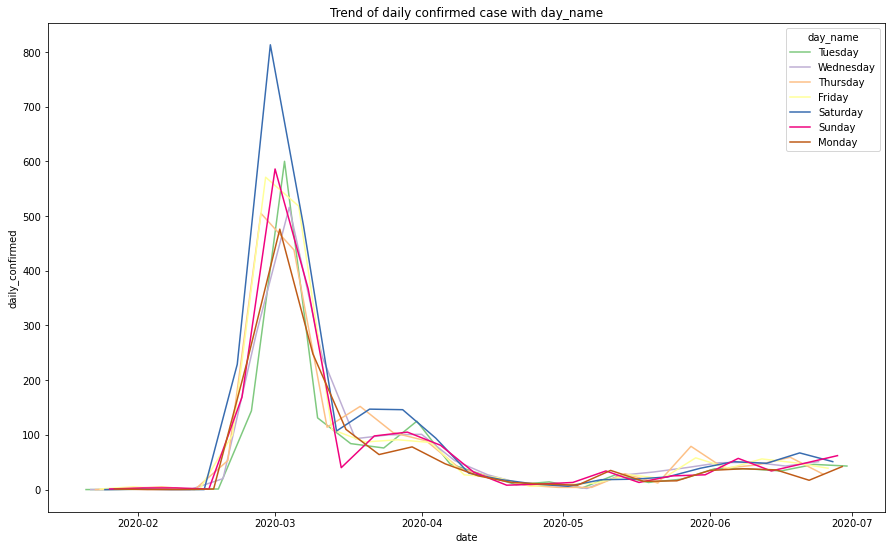

In [16]:
plt.figure(figsize=(15,9))
sns.lineplot(data=time_copy, x="date", y="daily_confirmed", hue= 'day_name', palette = "Accent" )
plt.title('Trend of daily confirmed case with day_name')

### The highest confirmed case was on saturday 

Text(0.5, 1.0, 'Trend of daily released with day_name')

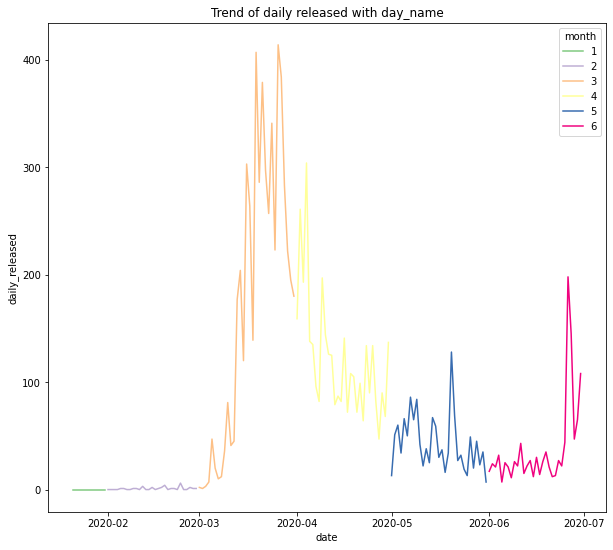

In [17]:
plt.figure(figsize=(10,9))
sns.lineplot(data=time_copy, x="date", y="daily_released", hue= 'month', palette = 'Accent')

plt.title( "Trend of daily released with day_name" )

### Most released cases were in March which is obvious because most confirmed case were in february

# EDA on the timeage (Time series data of COVID-19 status in terms of age in South Korea) data table.

In [18]:
#change date column into datetime
timea['date'] = timea['date'].astype('datetime64[ns]')

In [19]:
age_confirmed = timea.groupby('age')['confirmed'].max() #Group age by number of confirmed
age_deceased = timea.groupby('age')['deceased'].max() # Group age by number of deceased

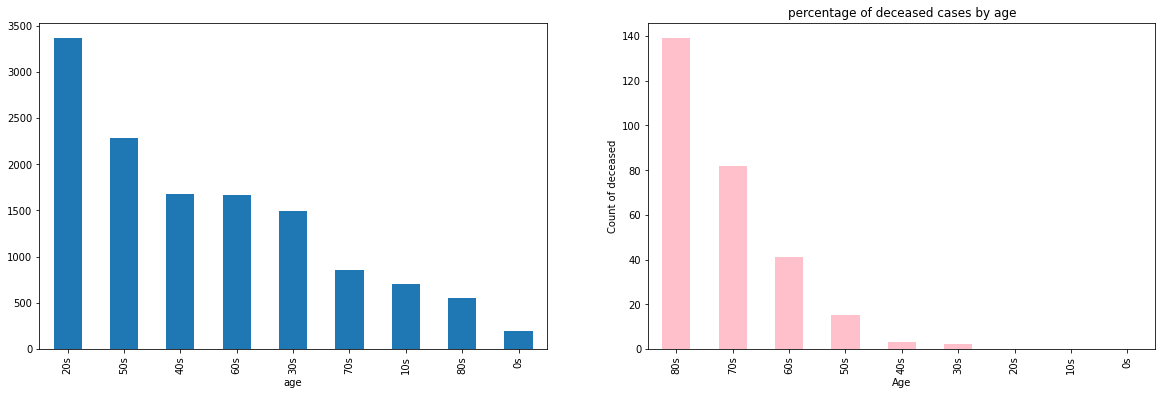

In [20]:
# What is the highest number of confirmed  and deceased cases by age?
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot).


# Subplot 1: 
age_confirmed.sort_values(ascending=False).plot(kind='bar', figsize=(20, 6), ax=ax0) # add to subplot 1
ax1.set_title ('Number of confirmed cases by age')
ax1.set_ylabel('Count of confirmed')
ax1.set_xlabel('Age')

# Subplot 1:
age_deceased.sort_values(ascending=False).plot(kind="bar", color="pink",figsize=(20, 6),ax=ax1)
ax1.set_title ('percentage of deceased cases by age')
ax1.set_ylabel('Count of deceased')
ax1.set_xlabel('Age')



plt.show()

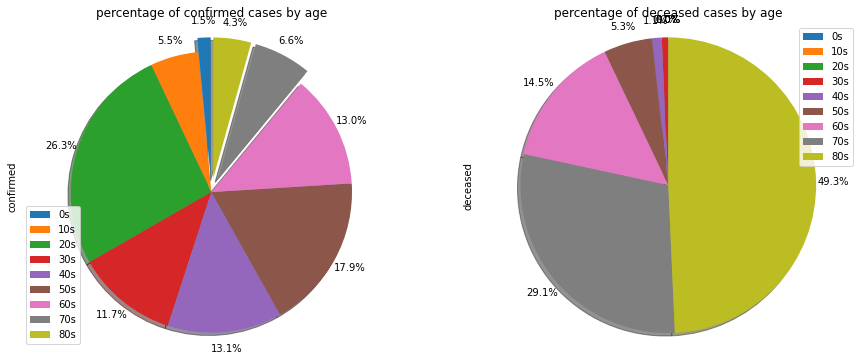

In [21]:
# What is the percentage of confirmed  and deceased cases by age?
fig = plt.figure() # create figure

ax2 = fig.add_subplot(1, 2, 1)
ax3 = fig.add_subplot(1, 2, 2)

explode_list = [0.1, 0, 0, 0,0,0,0 ,0.1, 0.1]
age_confirmed.plot(kind='pie',figsize=(15, 6),autopct='%1.1f%%', startangle=90,shadow=True, labels=None,pctdistance=1.12,explode=explode_list, ax=ax2) # add to subplot 1
ax2.set_title('percentage of confirmed cases by age')
ax2.axis('equal') 
# add legend
ax2.legend(labels=age_confirmed.index, loc='lower left')


age_deceased.plot(kind='pie',figsize=(15, 6),autopct='%1.1f%%', startangle=90,shadow=True, labels=None,pctdistance=1.12, ax=ax3) # add to subplot 2
ax3.set_title ('percentage of deceased cases by age')
ax3.axis('equal') 
# add legend
ax3.legend(labels=age_deceased.index, loc='upper right')

plt.show()

# EDA on the timegender (Time series data of COVID-19 status in terms of gender in South Korea) data table

In [22]:
timeg.tail()


,date,time,sex,confirmed,deceased
237,2020-06-28,0,female,7265,131
238,2020-06-29,0,male,5470,151
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151
241,2020-06-30,0,female,7305,131


In [23]:
# convert date to datetime object and split date into month and day
timeg['date'] = timeg['date'].astype('datetime64[ns]')
timeg['month'] = timeg['date'].dt.month
timeg['day'] = timeg['date'].dt.day

In [24]:
gender_confirmed = timeg.groupby('sex')['confirmed','deceased'].max()
month_confirmed = timeg.groupby('month')['confirmed','deceased'].max()
gender_confirmed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,confirmed,deceased
sex,,
female,7305,131
male,5495,151


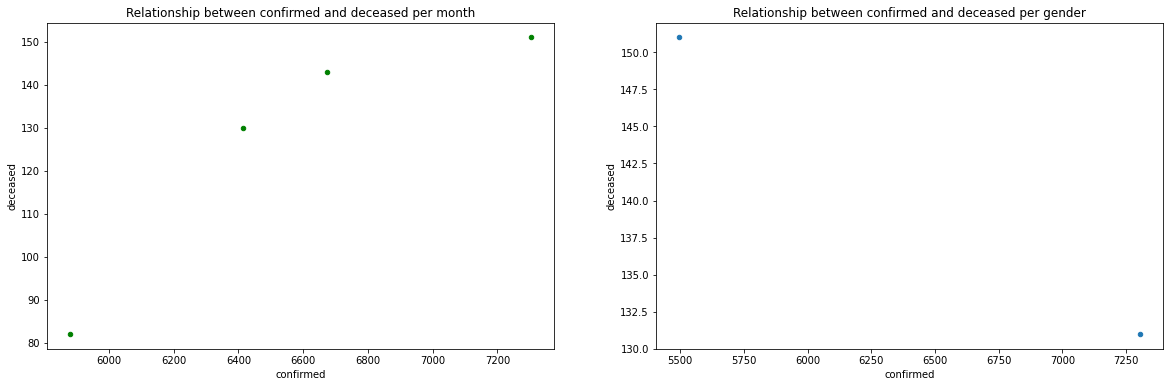

In [25]:
#What is the relationship between confirmed and deceased on month?
fig = plt.figure() # create figure

ax2 = fig.add_subplot(1, 2, 1)
ax3 = fig.add_subplot(1, 2, 2)

month_confirmed.plot(kind='scatter',x='confirmed',y='deceased',figsize=(20,6), color='green', ax=ax2) # add to subplot 1
ax2.set_title('Relationship between confirmed and deceased per month')

gender_confirmed.plot(kind='scatter',x='confirmed',y='deceased',ax=ax3) # add to subplot 2
ax3.set_title ('Relationship between confirmed and deceased per gender')

plt.show()


### There is positive correlation between the confirmed and deceased cases by month but a negative correlation by gender

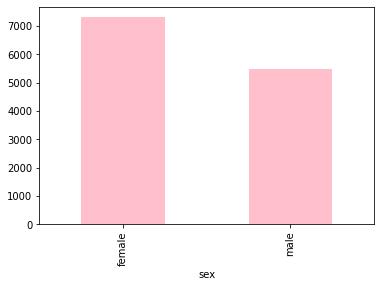

In [26]:
gender_confirmed = timeg.groupby('sex')['confirmed'].max()
gender_confirmed.sort_values(ascending=False).plot(kind="bar", color="pink")

# Statistical testing on fatality rate for both gender = (deceased/confirmed).


### This is two proportional test and i would be using the two proportional z test at 95% confidence level.
H0 = Proportion of male and female fatality rate are the same

HA = Proportion of male and female fatality rate are NOT the same

In [27]:
gender_confirmed = timeg.groupby('sex')['confirmed'].max()
print(gender_confirmed)
gender_deceased = timeg.groupby('sex')['deceased'].max()
print(gender_deceased)

sex
female    7305
male      5495
Name: confirmed, dtype: int64
sex
female    131
male      151
Name: deceased, dtype: int64


Verify that the difference in the fatality rate between male and female groups is statistically significant using z-test, 95% confidence level.

In [28]:
#proportion of male
p_male = 151/5495
print(p_male)
#proportion of female
p_female = 131/7305
print(p_female)

0.027479526842584166
0.017932922655715264


In [29]:
difference = p_male - p_female

male_confirmed = timeg[(timeg["sex"] == "male")]["confirmed"].max()
male_deceased = timeg[(timeg["sex"] == "male")]["deceased"].max()


female_confirmed = timeg[(timeg["sex"] == "female")]["confirmed"].max()
female_deceased = timeg[(timeg["sex"] == "female")]["deceased"].max()

#overall proportion
p_overall = (female_deceased + male_deceased) / (female_confirmed + male_confirmed)


p_overall_denom = p_overall * (1 - p_overall)
counts_denom = (1/male_confirmed + 1/female_confirmed)

#calculate standard error
standard_error = math.sqrt(p_overall_denom * counts_denom)

# Margin_error = z_score * standard error at 95% confidence level
M_Error = round(norm.ppf(1-(0.05/2)) * standard_error,5)

#confidence interval = best estimate +- Margin of error
lower_bound= difference - M_Error 
upper_bound= difference + M_Error
print('lower bound',lower_bound)
print('upper bound', upper_bound)
print('best estimate', difference)


lower bound 0.004406604186868903
upper bound 0.014686604186868901
best estimate 0.009546604186868902


In [30]:
#perform z test
z_score = (p_male - p_female) / standard_error

male_confirmed, female_confirmed, male_deceased,female_deceased, z_score, standard_error

(5495, 7305, 151, 131, 3.6421332621164604, 0.0026211572998076755)

In [31]:
successes = [male_deceased, female_deceased]
nobs = [male_confirmed, female_confirmed]
ztest ,pval = proportions_ztest(successes, nobs=nobs)
print('Ztest :', ztest)
print('P_value :', float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Ztest : 3.6421332621164604
P_value : 0.00027038802908660496
reject null hypothesis


### The p value is less than the alpha (0.05), hence we reject the null hypothesis(proportion are the same). There is a statistical difference between the  fatality rate of male and female. Male died more than female.

# EDA on the timeprovince (Time series data of COVID-19 status in terms of province in South Korea) data table

In [32]:
timep.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


# EDA on the patient info (Epidemology info of COVID-19 patient) data table

In [33]:
patient.head(5)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [34]:
#check for missing value
patient.isnull().sum()

patient_id               0
sex                   1122
age                   1380
country                  0
province                 0
city                    94
infection_case         919
infected_by           3819
contact_number        4374
symptom_onset_date    4475
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64

In [35]:
# Remove symbols from sex column
patient['age'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [36]:
#Show a table summarizing province by gender and state.
pd.crosstab(patient.province,[patient.sex,patient.state], margins=True, margins_name="Total")

sex                 female                       male                   Total
state             deceased isolated released deceased isolated released      
province                                                                     
Busan                    1       11       58        2       24       53   149
Chungcheongbuk-do        0        1       28        0        5       22    56
Chungcheongnam-do        0       13       98        0        4       52   167
Daegu                    7       63        3       13       50        1   137
Daejeon                  1       43       21        0       31       23   119
Gangwon-do               2        6       21        1        8       25    63
Gwangju                  0       14       11        0        7       12    44
Gyeonggi-do              0      405       26        1      363       35   830
Gyeongsangbuk-do        17       78      650       25       53      429  1252
Gyeongsangnam-do         0        2       55        0        4       68   129
Incheon                  0      143       53        0      104       43   343
Jeju-do                  0        0       11        0        0        4    15
Jeollabuk-do             0        3        7        0        3       14    27
Jeollanam-do             0        0        8        0        5       12    25
Sejong                   0        3       19        0        0       28    50
Seoul                    0        3      309        4        3      265   584
Ulsan                    0        0       24        1        2       26    53
Total                   28      788     1402       47      666     1112  4043

In [37]:
#Which gender has the most group infection case?
#merge case and patient data
case_patient = pd.merge(case, patient,how='inner')

In [38]:
sex_group = case_patient.groupby(['sex','group'])['group'].count()
sex_group

sex     group
female  True     152
male    True     103
Name: group, dtype: int64

### Female has more group infection than male

In [39]:
patient = patient[patient['sex'].notna()]
patient = patient[patient['age'].notna()]
patient = patient[patient['age'].notna()]

In [40]:
#Drop all rows where sex,age and infection_case is null
patient_new = patient.dropna(subset=['sex','age','infection_case'])

In [41]:
patient_new.isnull().sum()

patient_id               0
sex                      0
age                      0
country                  0
province                 0
city                    54
infection_case           0
infected_by           1994
contact_number        2235
symptom_onset_date    2415
confirmed_date           3
released_date         1953
deceased_date         2927
state                    0
dtype: int64

In [42]:
#find the percentage of missing value for each column
mask = patient_new.isnull()
total = mask.sum()
percent = 100*mask.mean()
missing_data = pd.concat([total, percent], axis=1,join='outer',
keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False,
inplace=True)
missing_data

,count_missing,perc_missing
deceased_date,2927,99.052453
symptom_onset_date,2415,81.725888
contact_number,2235,75.634518
infected_by,1994,67.478849
released_date,1953,66.091371
city,54,1.827411
confirmed_date,3,0.101523
patient_id,0,0.000000
sex,0,0.000000
age,0,0.000000


In [43]:
#drop all columns with missing values, patient_id, country and confirmed_date
patient_new = patient_new.drop(['country','patient_id','deceased_date','symptom_onset_date','contact_number',
                                'infected_by','released_date','city'], axis = 1)

In [44]:
#Change all features to numeric
patient_new['province'] = patient_new['province'].astype('category').cat.codes #change to numeric
patient_new['age'].astype('int') # change age data type to int
d_sex = {"male": 1, "female" : 0}
patient_new['sex'] = patient_new['sex'].map(d_sex) #convert sex to numeric
patient_new['infection_case'] = patient_new['infection_case'].astype('category').cat.codes
patient_new['confirmed_date'] = pd.to_datetime(patient['confirmed_date'])

In [45]:
#Find the correlation between our features
patient_new.corr()

,sex,province,infection_case
sex,1.000000,0.021470,0.051424
province,0.021470,1.000000,-0.122529
infection_case,0.051424,-0.122529,1.000000


### There is no correlation between the features hence our model would not be adversely affected by redundant features

# Modelling

### Label Encoding: Label encode the target feature

In [46]:
patient_new['state'].value_counts()

released    1855
isolated    1065
deceased      35
Name: state, dtype: int64

In [47]:
#label encode the target variable
target = patient_new['state']
features = patient_new.drop(['confirmed_date','state'],axis = 1)

le = LabelEncoder()
le.fit(target)
enc_target = pd.Series(le.transform(target)).to_frame()
enc_target.value_counts()

2    1855
1    1065
0      35
dtype: int64

### PCA( Dimensionality Reduction of the patient data)

In [48]:
pca = PCA()
pca.fit(features)
pca.explained_variance_ratio_

array([8.47787195e-01, 1.10208609e-01, 4.14633394e-02, 5.40856920e-04])

Text(0, 0.5, 'Cumulative Explained Variance')

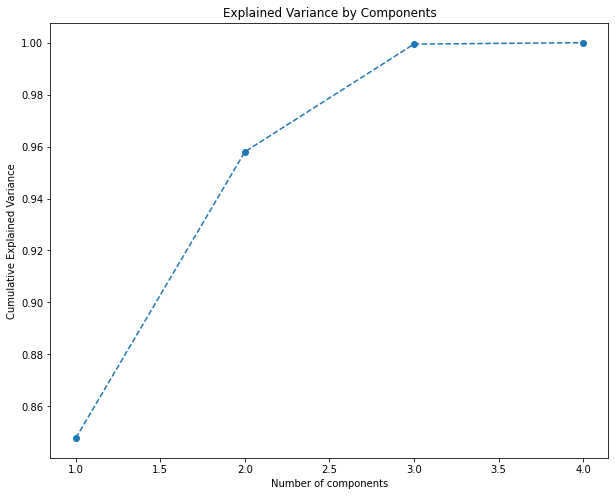

In [49]:
plt.figure(figsize = (10,8))
plt.plot(range(1,5),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle="--")
plt.title('Explained Variance by Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

### We would be retaining almost 96% of our information at second component which is okay

In [50]:
pca = PCA(n_components = 2)
pca.fit(features)
data_pca = pca.transform(features)
variance = pca.explained_variance_ratio_
print(variance)

#Save components to a DataFrame
PCA_components = pd.DataFrame(data_pca)

[0.84778719 0.11020861]


In [51]:
#create a dataframe to store the components 
principalDf = pd.DataFrame(data = data_pca,columns = ['principal component 1', 'principal component 2' ])
finalDf = pd.concat([principalDf, target], axis = 1)

In [52]:
#2d representation of patient data, verify its seperability
fig = px.scatter(data_pca, x = 0, y = 1, color = target)
fig.show(title="Separability of the target variable in the data", xlabel = 'PCA 1',ylabel = 'PCA 2')

### Figure above shows no clearly distinguishable clusters. This factoid tells us that the observations in the dataset cannot be grouped

### Logistic Regression

In [53]:
X_train, X_test, y_train, y_test = train_test_split(features,enc_target,test_size=0.2,random_state=42)

In [54]:
model = LogisticRegression(max_iter=600)
model.fit(X_train,y_train.values.ravel())
prediction = model.predict(X_test)
print("Validation accuracy")
print(accuracy_score(y_test, prediction))

Validation accuracy
0.5736040609137056


### An accuracy score of 0.6 is fair. Our model can predict fairly the state of patient

### Logistic regression after reducing our data (pca)

In [55]:
pca_x_train, pca_x_test,pca_y_train,pca_y_test = train_test_split(data_pca,enc_target,test_size = 0.2)

In [56]:
pca_model = LogisticRegression()
pca_model.fit(pca_x_train,pca_y_train.values.ravel())
pca_prediction = pca_model.predict(pca_x_test)
print("Validation accuracy")
print(accuracy_score(pca_y_test,pca_prediction))

Validation accuracy
0.5972927241962775


### An accuracy 0.62 was obtained when my data was reduced, this was better compare to the non reduced data.

#  Clustering (k means) with pca data

Text(0, 0.5, 'Inertia')

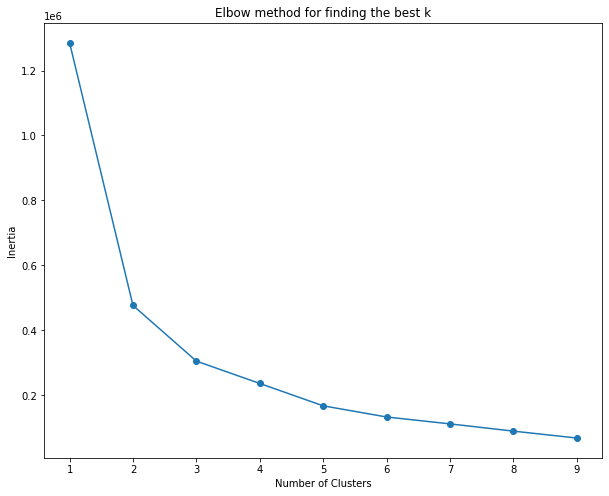

In [57]:
# Use Elbow method for finding the best k
Inertia = []
for i in range (1,10):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(data_pca)
  Inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,10), Inertia, marker="o")
plt.title('Elbow method for finding the best k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

The best cluster is at 3 as that is where the elbow has no vivid change

In [58]:
#Initialize the class object
kmeans = KMeans(n_clusters=3)
 
#predict the labels of clusters.
kmeans.fit_predict(data_pca)
#label = kmeans.predict()
 
#print(label)

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [59]:
data_pca_seg = pd.concat([patient_new.reset_index(drop=True), pd.DataFrame(data_pca)], axis =1)
data_pca_seg.columns.values[-2:] = ['Component 1','Component 2'] 
data_pca_seg['Segment k-means PCA'] = kmeans.labels_

In [60]:
data_pca_seg.head()

,sex,age,province,infection_case,confirmed_date,state,Component 1,Component 2,Segment k-means PCA
0,1,50,15,32,2020-01-23,released,9.816569,-5.252884,1
1,1,30,15,32,2020-01-30,released,-10.128880,-3.824743,0
2,1,50,15,28,2020-01-30,released,10.109452,-1.298709,1
3,1,20,15,32,2020-01-30,released,-20.101605,-3.110673,0
4,0,20,15,28,2020-01-31,released,-19.805855,0.845460,0


In [61]:
data_pca_seg['Segment'] = data_pca_seg['Segment k-means PCA'].map({0:'first', 1:'second',2: 'third'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



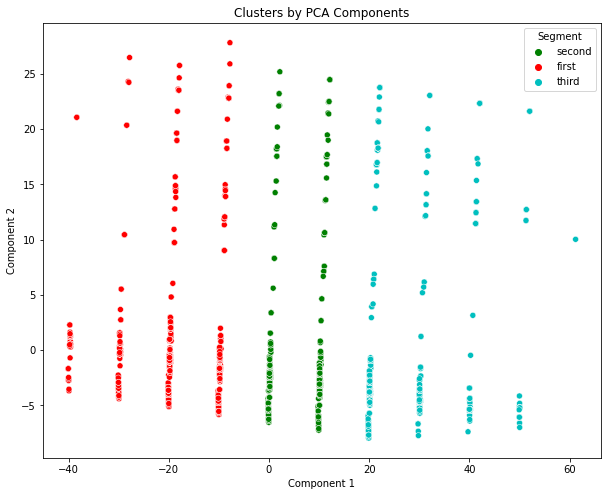

In [62]:
x_axis = data_pca_seg['Component 1']
y_axis = data_pca_seg['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = data_pca_seg['Segment'], palette = ['g','r','c'])
plt.title('Clusters by PCA Components')
plt.show()

In [63]:
kmeans_silhouette = silhouette_score(data_pca, kmeans.labels_).round(2)
kmeans_silhouette

0.51

# Conclusion

### There was statistical significant difference in the fatality rate for male and female. Also When the data was reduced by dimensionality reduction, there was no obvious seperability, this means clustering would not do well on the data. The acuracy of the model increased when we did PCA, this could be because the computation was increased.

#### 2016 US presidential elections

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1583340806569-6da3d5ea9911?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1315&q=80" /></div>

In 2016, Donald Trump lost the popular vote, yet he won the electoral vote, securing 4 years in the Oval Office. This has been a shock to democrat supporters all around the world.

Imagine you travel back in time to 2016. As soon as you step out of your time-capsule, the Democratic Party hires you. They want you, the best data scientist across the time and space, **to explain what happened and what should have been done differently**. They want you to **prepare them for 2020 presidential elections**.

The Party has some tips for you - inspect the voters. What are Trump supporters? What do they feature? What are our supporters? Where should focus next? Any pro-trump states? Cities?

The Democrats were kind of enough to share [a Kaggle dataset](https://www.kaggle.com/benhamner/2016-us-election) with you on 2016 U.S. elections. Use the data to help the Democrats.

#### Fatal Police Shooting in United States

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1606352466047-7cef02b312bb?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1662&q=80" /></div>

[Police brutality in the United States](https://en.wikipedia.org/wiki/Police_brutality_in_the_United_States) has been an nationwide issue since the 20th century. Public safety of U.S. citizens is a typical argument to justify the controversially high number of fatal shootings.

You are a contractor to the United States Department of Justice. **You have been given a case to investigate fatal police shootings throughout the United States of America, provide a list of issues, and propose a plan on how to tackle these issues**.

The department offered some tips - the public opinion indicates that there's something systematically fishy of police actions against civilians, some states differ from other, some cities are different from others, race equality is still an unanswered question, there's some talk about huge spendings on police, rumors about mental issues of those getting shot. Government is all about prioritizing - use the data to list issues with the police activity and propose a plan which issues to tackle first and how.

Your are given 1 dataset to start with. Try to search for more datasets to enrich your data analysis.

Here's the dataset:

* [Fatal Police Shootings in the U.S. '15 - '17](https://www.kaggle.com/washingtonpost/police-shootings).

## Evaluation Criteria

- Code quality
- Fulfillment of the idea
- Adherence to the requirements
- Delivery of the presentation

#### Statistical hypothesis testing
- Correct statistical test method is used, based on the situation.
- Reasoning on chosen statistical significance level.

#### Modeling
- Both PCA and T-SNE algorithms are used.